# Coding support vector machines in sklearn

- BOOK: [Grokking ML](https://www.manning.com/books/grokking-machine-learning) by Luis G. Serrano
- SOFTWARE: [Chapter_11_Support_Vector_Machines](https://github.com/luisguiserrano/manning/tree/master/Chapter_11_Support_Vector_Machines) by Luis G. Serrano
- To help understand [HW 2 Multimodal Machine Learning for Emotion Recognition](https://github.com/Brinkley97/csci_535_multimodal_probabilistic_learning/tree/main/hw/2-multimodal_machine_learning_for_emotion_recognition), specifically [visual modality](https://github.com/Brinkley97/csci_535_multimodal_probabilistic_learning/blob/main/hw/2-multimodal_machine_learning_for_emotion_recognition/visual-main.ipynb) at the moment

# Imports + Load Data

In [49]:
import pandas as pd
import numpy as np

from matplotlib import pyplot
from sklearn.svm import SVC

In [4]:
BASE = "/Users/brinkley97/Documents/development/"
CLASS_PATH = "classes/csci_535_multimodal_probabilistic_learning/"
DATASET_PATH = "datasets/"
FILE = "linear.csv"
file_path = BASE + CLASS_PATH + DATASET_PATH + FILE
# file_path

In [53]:
df = pd.read_csv(file_path)
df.head(8)

,Unnamed: 0,x_1,x_2,y
0,0,-2.921542,-2.924093,0
1,1,0.136782,0.540402,1
2,2,2.747296,1.547237,1
3,3,-2.780707,-2.673131,0
4,4,2.030421,1.329452,1
5,5,-0.314170,-2.591670,0
6,6,-1.896219,-0.516953,0
7,7,1.432148,0.841080,1


In [9]:
X_df = df.loc[0:, ['x_1', 'x_2']]
y_df = df.loc[0:, ['y']]

X = np.array(X_df)
y = np.array(y_df).astype(int)

In [10]:
len(X), X.shape

(60, (60, 2))

In [11]:
len(y), y.shape

(60, (60, 1))

In [31]:
new_df = pd.concat([y_df, X_df], axis=1)
new_df.head()

,y,x_1,x_2
0,0,-2.921542,-2.924093
1,1,0.136782,0.540402
2,1,2.747296,1.547237
3,0,-2.780707,-2.673131
4,1,2.030421,1.329452


In [36]:
# y0s = new_df.loc[0:, 'y'].values == 0
# y0

y0s = new_df.y == 0
y0s_df = new_df[y0s]
y0s_df.head()

,y,x_1,x_2
0,0,-2.921542,-2.924093
3,0,-2.780707,-2.673131
5,0,-0.314170,-2.591670
6,0,-1.896219,-0.516953
9,0,-2.634456,1.428708


In [38]:


y1s = new_df.y == 1
y1s_df = new_df[y1s]
y1s_df.head()

,y,x_1,x_2
1,1,0.136782,0.540402
2,1,2.747296,1.547237
4,1,2.030421,1.329452
7,1,1.432148,0.841080
8,1,0.885989,2.424742


In [47]:
np.shape(X_df), np.shape(y0s_df), np.shape(y1s_df)

((60, 2), (30, 3), (30, 3))

# Visual Representation of X and y

In [50]:
def plot_points(features, labels):
    
    # X = np.array(features)
    # y = np.array(labels)
    
    spam_emails = X[np.argwhere(y==1)]
    # print("spam_emails:", spam_emails)
    not_spam_emails = X[np.argwhere(y==0)]
    # print("not_spam_emails:", not_spam_emails)
    
    
    
    pyplot.scatter([s[0][0] for s in spam_emails],
                   [s[0][1] for s in spam_emails],
                   s = 35,
                   color = 'cyan',
                   edgecolor = 'k',
                   marker = '^')
    pyplot.scatter([s[0][0] for s in not_spam_emails],
                   [s[0][1] for s in not_spam_emails],
                   s = 25,
                   color = 'red',
                   edgecolor = 'k',
                   marker = 's')
    pyplot.xlabel('x_1')
    pyplot.ylabel('x_2')
    pyplot.legend(['label 1','label 0'])

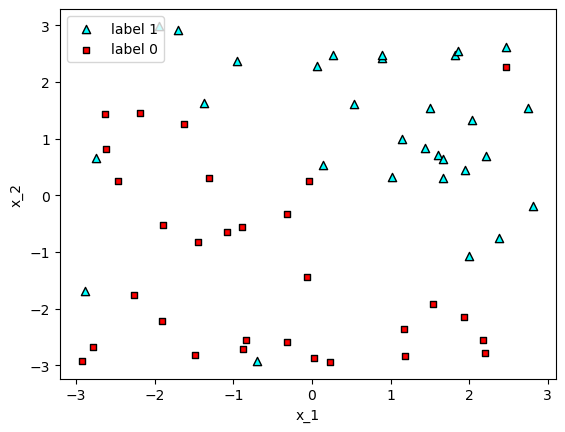

In [52]:
# print(X, y)
plot_points(X, y)

In [58]:
# pyplot.scatter(y0s_df, y1s_df)
# # color = 'red',
# # edgecolor = 'k',
# # marker = 's'
# pyplot.xlabel('x_1')
# pyplot.ylabel('x_2')
# pyplot.legend(['label 1','label 0'])

In [54]:
# pyplot.scatter(y0s_df, y1s_df)


# Without hyper-parameter tuning

In [56]:
def plot_model(X, y, model):
    X = np.array(X)
    y = np.array(y)
    plot_step = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    pyplot.contour(xx, yy, Z,colors = 'k',linewidths = 3)
    plot_points(X, y)
    pyplot.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1,2))
    pyplot.show()

/Users/brinkley97/opt/anaconda3/envs/emotion_rec_from_audiovisual/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy: 0.9333333333333333


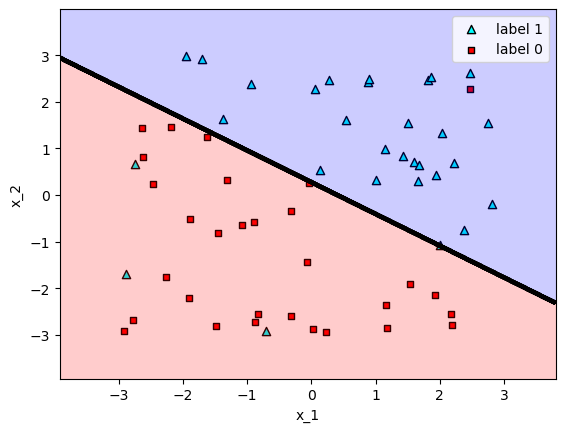

In [57]:
svm_linear = SVC(kernel='linear') 
svm_linear.fit(X,y) 
print("Accuracy:", svm_linear.score(X, y)) 
plot_model(X, y, svm_linear)